In [1]:
import seaborn as sns

In [2]:
%matplotlib inline

In [3]:
tips = sns.load_dataset('tips')

In [4]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


#### Instead of using distplot (which is deprecated) we can use either displot or histplot but inorder to get kernel density estmitation kde = True should be added to both these.

#### displot

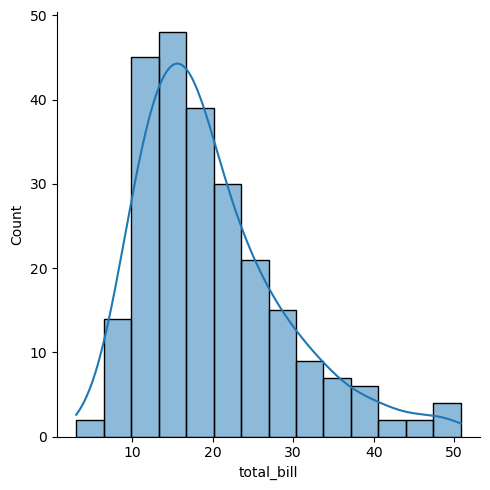

In [14]:
sns.displot(tips['total_bill'],kde = True)

#### histplot

<Axes: xlabel='total_bill', ylabel='Count'>

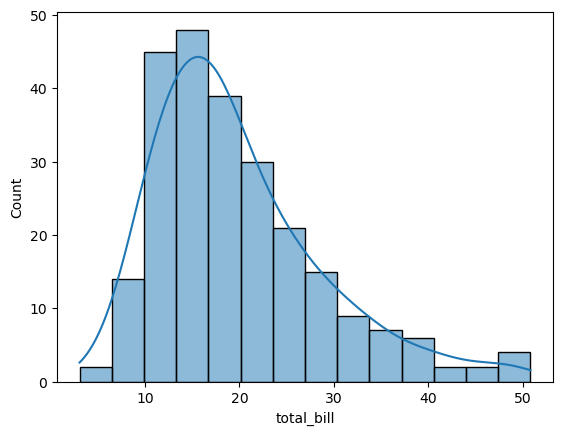

In [13]:
sns.histplot(tips['total_bill'],kde = True)

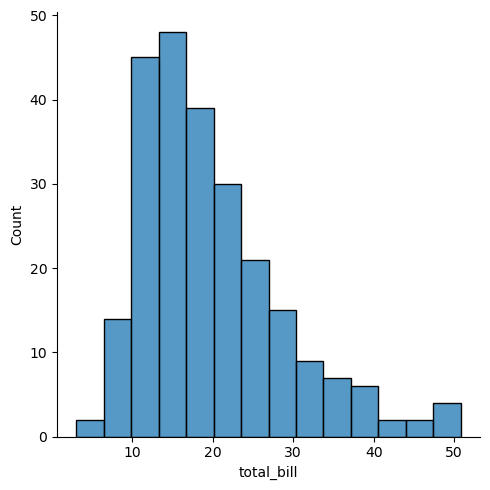

In [15]:
sns.displot(tips['total_bill'])

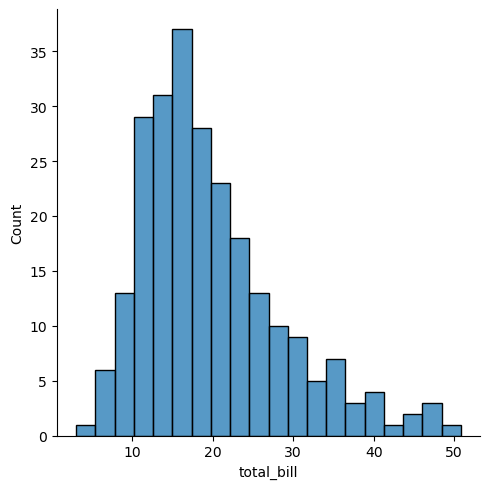

In [16]:
# here bins basically changes the x axis as per your choice
sns.displot(tips['total_bill'],bins = 20)

#### jointplot

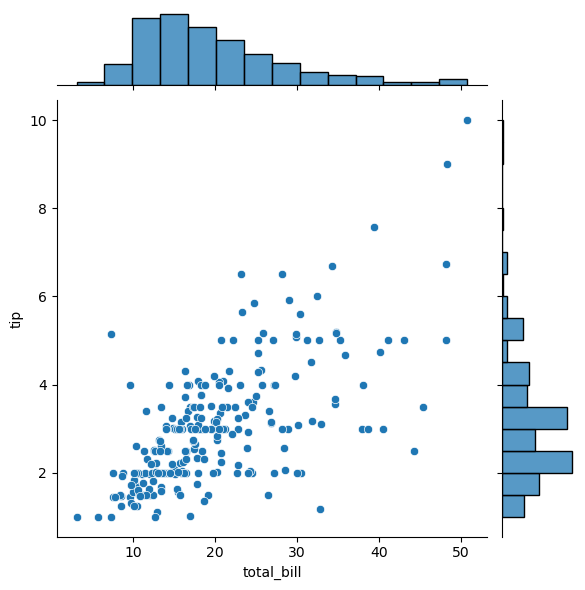

In [20]:
# It is like one column versus another whichs what happens to other when one changes and normally in center it gives a 
# scatterplot and x and y both should be numeric data.
sns.jointplot(x = 'total_bill', y = 'tip', data = tips)

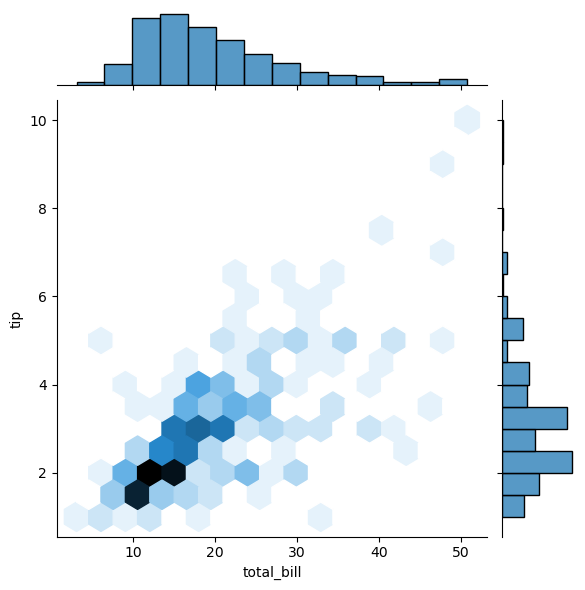

In [21]:
# By using kind the plot in centre can be changes
sns.jointplot(x = 'total_bill', y = 'tip', data = tips,kind = 'hex')

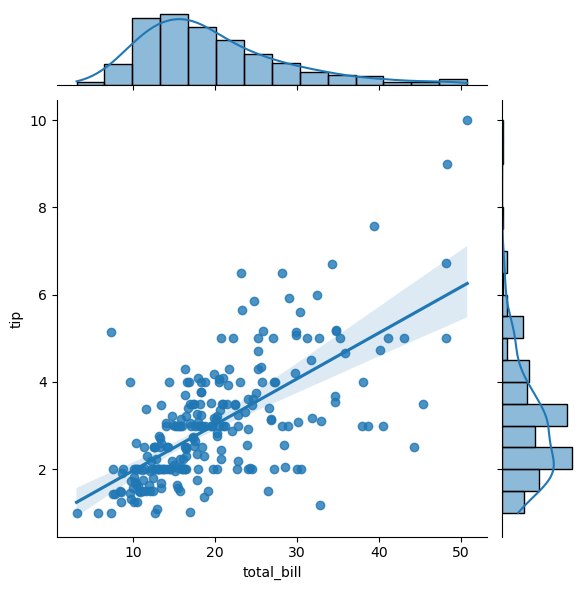

In [22]:
sns.jointplot(x = 'total_bill', y = 'tip', data = tips,kind = 'reg')

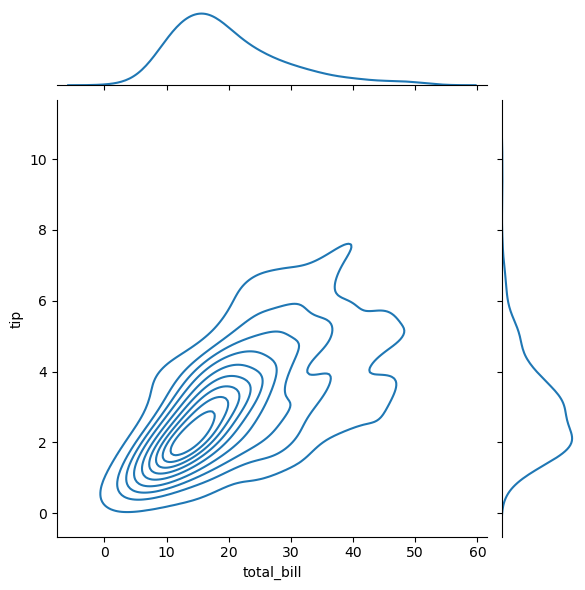

In [23]:
sns.jointplot(x = 'total_bill', y = 'tip', data = tips,kind = 'kde')

#### pairplot

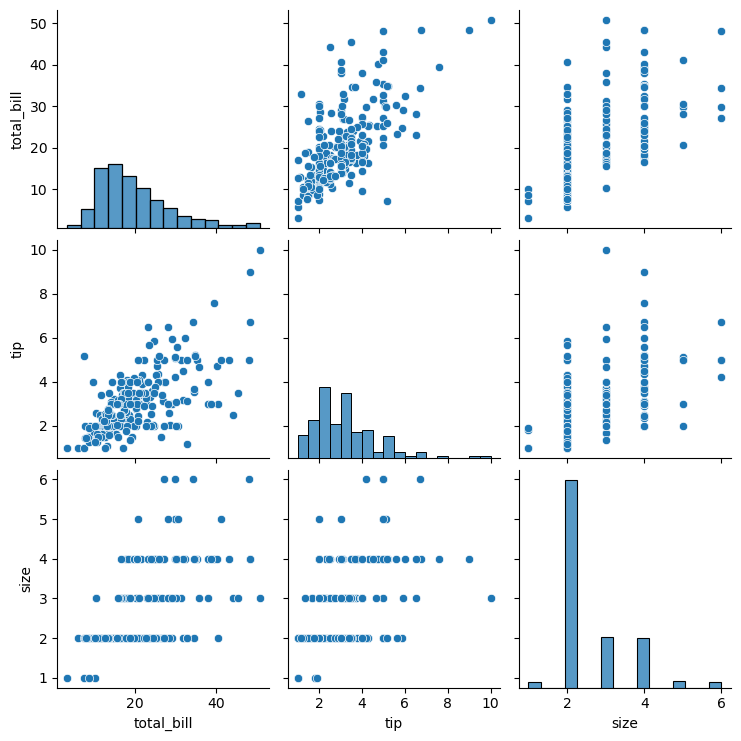

In [24]:
# Pairplot basically creates set of graphs considering all the columns in the dataset and comparing them all with each other
sns.pairplot(tips)

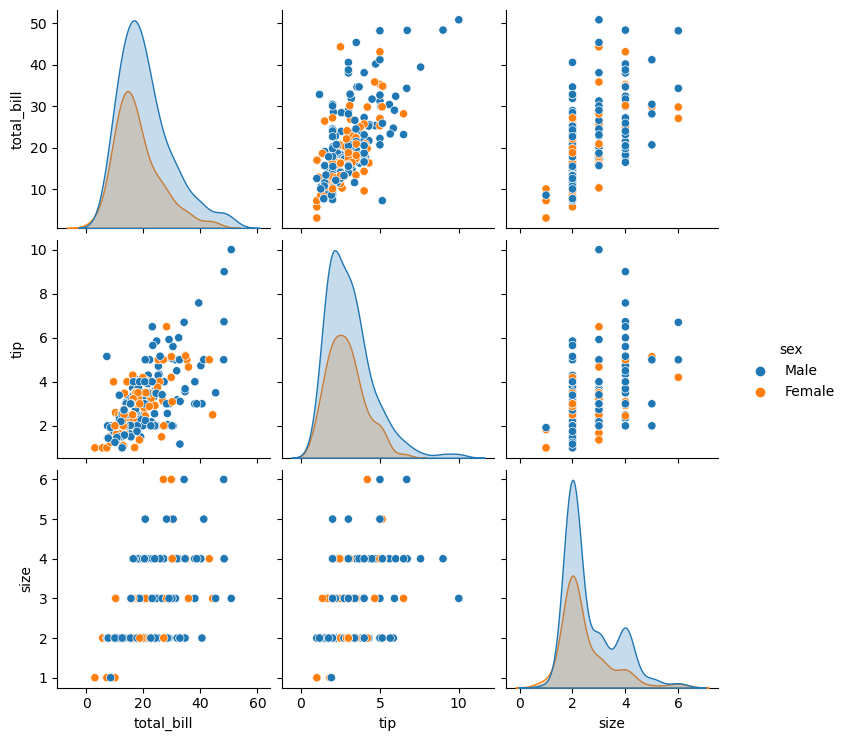

In [25]:
# hue basically differentiate the categorical data by using different colors.
sns.pairplot(tips,hue = 'sex')

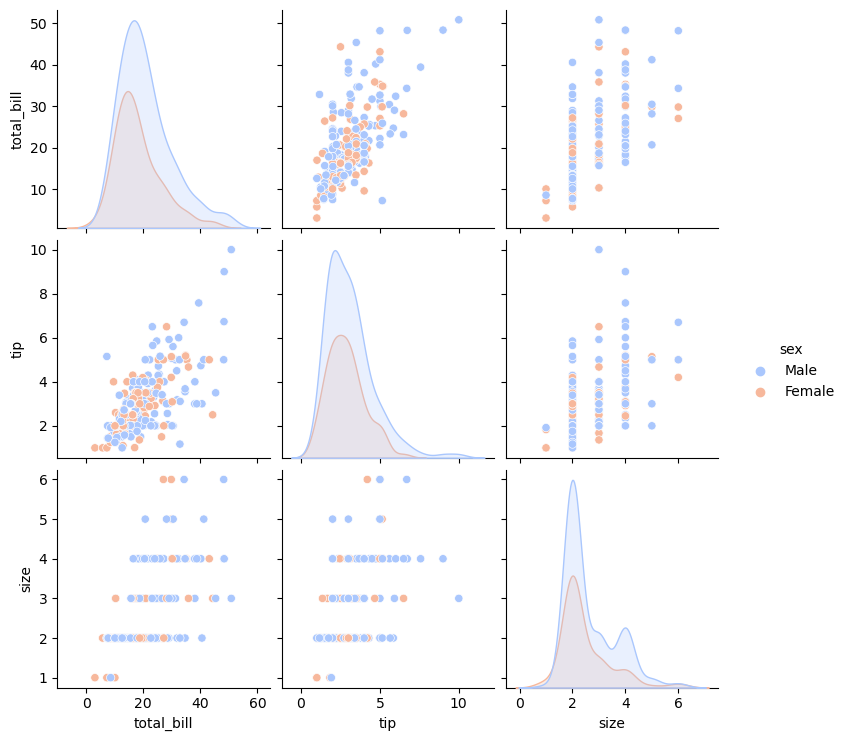

In [28]:
# palete basically make the graphs look pleasing to eyes 
sns.pairplot(tips,hue = 'sex',palette = 'coolwarm')

#### rugplot

<Axes: >

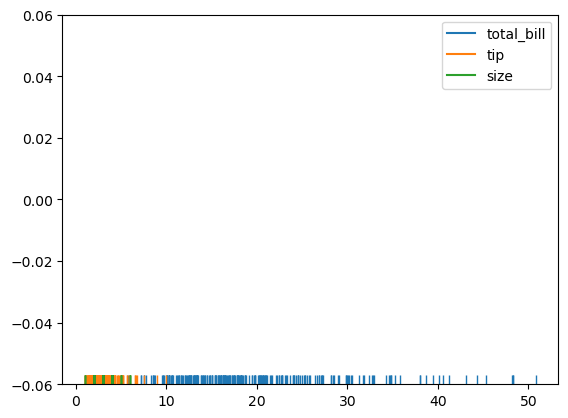

In [29]:
# it basically represents the number of instances each column has arrived. 
sns.rugplot(tips)

#### Creation of kernel density estimation using the following code

(0.0, 1.0)

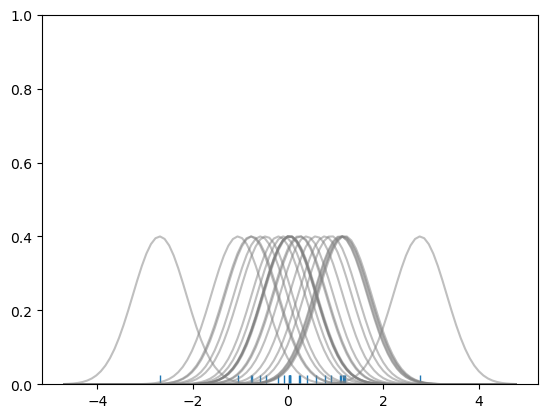

In [30]:
# Don't worry about understanding this code!
# It's just for the diagram below
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

#Create dataset
dataset = np.random.randn(25)

# Create another rugplot
sns.rugplot(dataset);

# Set up the x-axis for the plot
x_min = dataset.min() - 2
x_max = dataset.max() + 2

# 100 equally spaced points from x_min to x_max
x_axis = np.linspace(x_min,x_max,100)

# Set up the bandwidth, for info on this:
url = 'http://en.wikipedia.org/wiki/Kernel_density_estimation#Practical_estimation_of_the_bandwidth'

bandwidth = ((4*dataset.std()**5)/(3*len(dataset)))**.2


# Create an empty kernel list
kernel_list = []

# Plot each basis function
for data_point in dataset:
    
    # Create a kernel for each point and append to list
    kernel = stats.norm(data_point,bandwidth).pdf(x_axis)
    kernel_list.append(kernel)
    
    #Scale for plotting
    kernel = kernel / kernel.max()
    kernel = kernel * .4
    plt.plot(x_axis,kernel,color = 'grey',alpha=0.5)

plt.ylim(0,1)

Text(0.5, 0.98, 'Sum of the Basis Functions')

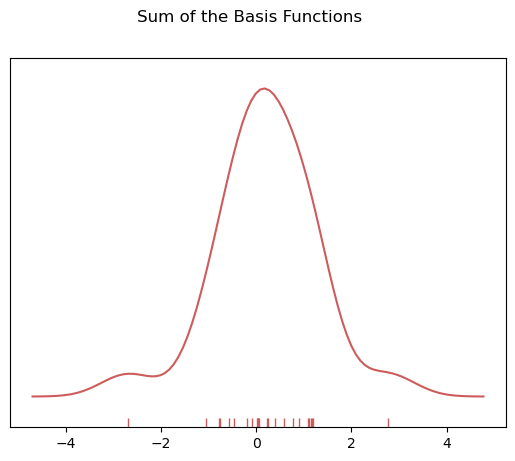

In [31]:
# To get the kde plot we can sum these basis functions.

# Plot the sum of the basis function
sum_of_kde = np.sum(kernel_list,axis=0)

# Plot figure
fig = plt.plot(x_axis,sum_of_kde,color='indianred')

# Add the initial rugplot
sns.rugplot(dataset,c = 'indianred')

# Get rid of y-tick marks
plt.yticks([])

# Set title
plt.suptitle("Sum of the Basis Functions")

#### kdeplot

<Axes: xlabel='total_bill', ylabel='Density'>

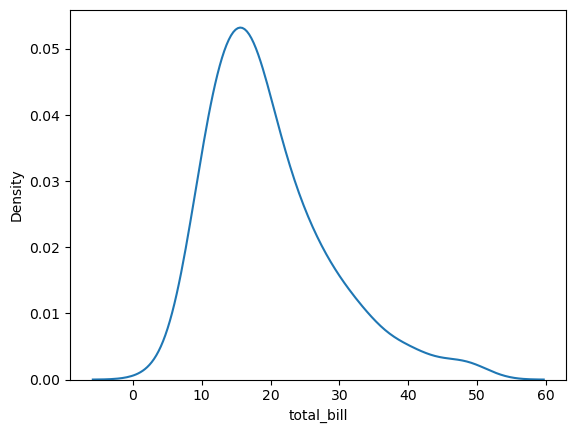

In [32]:
sns.kdeplot(tips['total_bill'])

<Axes: xlabel='total_bill', ylabel='Density'>

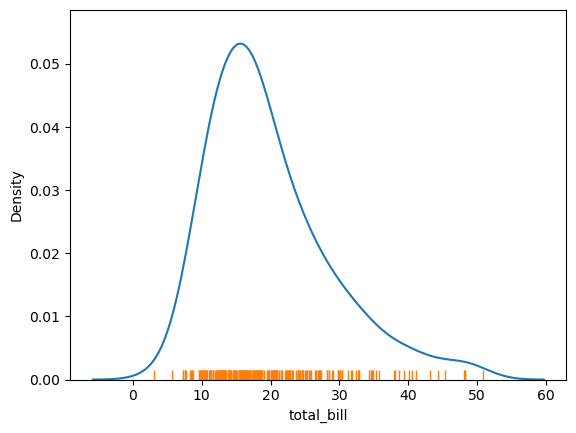

In [33]:
# when kdeplot and rugplot used together then we can get below
sns.kdeplot(tips['total_bill'])
sns.rugplot(tips['total_bill'])

<Axes: xlabel='tip', ylabel='Density'>

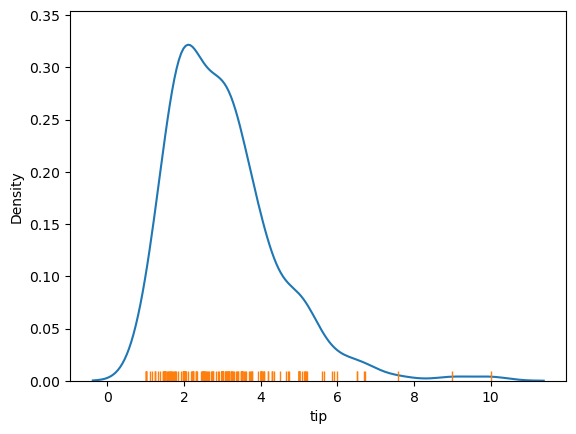

In [34]:
sns.kdeplot(tips['tip'])
sns.rugplot(tips['tip'])